
# Pytorch-Struct

[![Build Status](https://travis-ci.org/harvardnlp/pytorch-struct.svg?branch=master)](https://travis-ci.org/harvardnlp/pytorch-struct)
[![Coverage Status](https://coveralls.io/repos/github/harvardnlp/pytorch-struct/badge.svg?branch=master)](https://coveralls.io/github/harvardnlp/pytorch-struct?branch=master)

<p align="center">
  <img src="https://github.com/harvardnlp/pytorch-struct/raw/master/download.png">
  </p>



A library of tested, GPU implementations of core structured prediction algorithms for deep learning applications.
(or an implementation of <a href="https://www.cs.jhu.edu/~jason/papers/eisner.spnlp16.pdf">Inside-Outside and Forward-Backward Algorithms Are Just Backprop"<a/>)


## Getting Started

In [1]:
!pip install -qU git+https://github.com/harvardnlp/pytorch-struct
!pip install -q matplotlib

In [4]:
import torch
from torch_struct import DependencyCRF, LinearChainCRF
import matplotlib.pyplot as plt
def show(x): plt.imshow(x.detach())

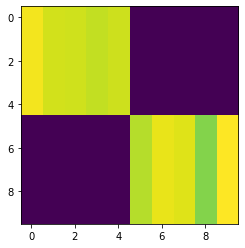

In [12]:
# Make some data.
vals = torch.zeros(2, 10, 10) + 1e-5
vals[:, :5, :5] = torch.rand(5)
vals[:, 5:, 5:] = torch.rand(5) 
dist = DependencyCRF(vals.log())
show(dist.log_potentials[0])

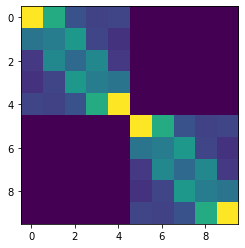

In [13]:
# Compute marginals
show(dist.marginals[0])

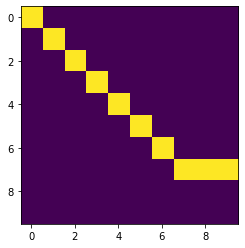

In [14]:
# Compute argmax
show(dist.argmax.detach()[0])

In [15]:
# Compute scoring and enumeration (forward / inside)
log_partition = dist.partition
max_score = dist.log_prob(dist.argmax)

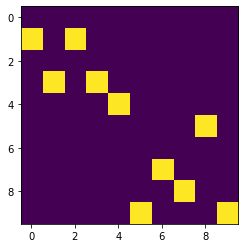

In [19]:
# Compute samples 
show(dist.sample((1,)).detach()[0, 0])

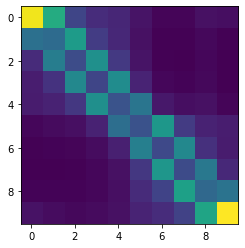

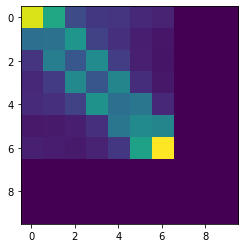

In [22]:
# Padding/Masking built into library.
dist = DependencyCRF(vals, lengths=torch.tensor([10, 7]))
show(dist.marginals[0])
plt.show()
show(dist.marginals[1])

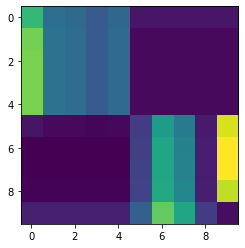

In [23]:
# Many other structured prediction approaches
chain = torch.zeros(2, 10, 10, 10) + 1e-5
chain[:, :, :, :] = vals.unsqueeze(-1).exp()
chain[:, :, :, :] += torch.eye(10, 10).view(1, 1, 10, 10) 
chain[:, 0, :, 0] = 1
chain[:, -1,9, :] = 1
chain = chain.log()

dist = LinearChainCRF(chain)
show(dist.marginals.detach()[0].sum(-1))

## Library

Current distributions implemented:

* LinearChainCRF 
* SemiMarkovCRF 
* DependencyCRF 
* TreeCRF 


Extensions:

* Integration with `torchtext`, `pytorch-transformers`, `dgl`
* Adapters for generative structured models (CFG / HMM / HSMM)
* Common tree structured parameterizations TreeLSTM / SpanLSTM

Design Strategy:

1) Minimal efficient python implementatations. 
2) Batched for GPU.
3) Code can be ported to other backends


## Low-level API: 

Everything implemented through semiring dynamic programming. 

* Log Marginals
* Max and MAP computation
* Sampling through specialized backprop
* Entropy and first-order semirings. 




## Examples

* BERT <a href="https://github.com/harvardnlp/pytorch-struct/blob/master/notebooks/BertTagger.ipynb">Part-of-Speech</a> 
* BERT <a href="https://github.com/harvardnlp/pytorch-struct/blob/master/notebooks/BertDependencies.ipynb">Dependency Parsing</a>
* Unsupervised Learning (to come)
* Structured VAE (to come)